# Prepare georeferenced data for artificial disease outbreak in Europe

In this notebook geospatial data from a shapefile is loaded, relevant attributes extracte and 


In [1]:
%matplotlib inline
import geopandas as gp
import pandas as pd

The geospatial vector dataset shapefile was downloaded from open access  NaturalEarthData, which provides free vector and raster map data. 

Download:
http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip

In [2]:
shp = 'Shapefile/ne_110m_admin_0_countries.shp'
geo_df = gp.GeoDataFrame.from_file(shp)
geo_df.head(1)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."


##### Attributes in shapefile

In [3]:
geo_df.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

##### Take only European countries and exclude Russia

In [4]:
geo_df_EU = geo_df[geo_df["REGION_UN"] == "Europe"]

geo_df_EU.set_index("ADMIN", inplace=True)
geo_df_EU.drop('Russia', axis=0, inplace=True)
geo_df_EU.reset_index(inplace=True)

/home/eneko/.miniconda3/envs/cook/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Retrieve relevant data

In [5]:
geo_df_EU = geo_df_EU[['geometry', 'POP_EST', 'ADMIN']]
geo_df_EU.head()

,geometry,POP_EST,ADMIN
0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",5347896.0,Norway
1,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",67059887.0,France
2,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",10285453.0,Sweden
3,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",9466856.0,Belarus
4,"POLYGON ((31.78599 52.10168, 32.15944 52.06125...",44385155.0,Ukraine


Compute population density based on Population density the number of people per unit of area,

In [6]:
geo_df_EU['POP_DENSITY'] = geo_df_EU['POP_EST']/(geo_df_EU['geometry'].area)

/home/eneko/.miniconda3/envs/cook/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


Normalization of pop density into a contact rate between 10 and 100 

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scaler.fit_transform(geo_df_EU['POP_DENSITY'].values.reshape(-1, 1))[:,0]
geo_df_EU['inf_rate'] = pd.Series(x_scaled)

In [8]:
geo_df_EU.head()

,geometry,POP_EST,ADMIN,POP_DENSITY,inf_rate
0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",5347896.0,Norway,59095.218795,0.012681
1,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",67059887.0,France,923490.631806,0.276615
2,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",10285453.0,Sweden,129464.357267,0.034167
3,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",9466856.0,Belarus,334504.027829,0.096774
4,"POLYGON ((31.78599 52.10168, 32.15944 52.06125...",44385155.0,Ukraine,628756.876391,0.186621


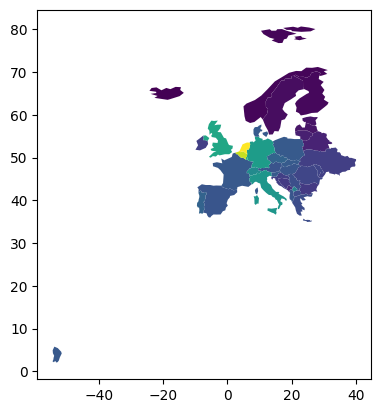

In [9]:
geo_df_EU.plot('inf_rate');

Give columns easy understandable names and remove unncessary columns

In [10]:
geo_df_EU.rename(columns={'ADMIN': 'country', 'POP_EST': 'population'},inplace=True )
geo_df_EU.drop(['POP_DENSITY'], axis=1, inplace=True)

Save results into new shapefle

In [11]:
geo_df_EU.to_file('geo_df_EU.shp', driver="ESRI Shapefile")

In [12]:
geo_df_EU

,geometry,population,country,inf_rate
0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",5347896.0,Norway,0.012681
1,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",67059887.0,France,0.276615
2,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",10285453.0,Sweden,0.034167
3,"POLYGON ((28.17671 56.16913, 29.22951 55.91834...",9466856.0,Belarus,0.096774
4,"POLYGON ((31.78599 52.10168, 32.15944 52.06125...",44385155.0,Ukraine,0.186621
5,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",37970874.0,Poland,0.279088
6,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",8877067.0,Austria,0.260907
7,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",9769949.0,Hungary,0.266325
8,"POLYGON ((26.61934 48.22073, 26.85782 48.36821...",2657637.0,Moldova,0.206089
9,"POLYGON ((28.23355 45.48828, 28.67978 45.30403...",19356544.0,Romania,0.208615
